<a href="https://colab.research.google.com/github/ireneb612/impact_EUTurkey_deal/blob/main/causal_estimation_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('fect')
set.seed(1234)
library(fect)
data(fect)
ls()

# Causal estimation of the EU_Turkey Deal on the crossings of migrants


In [ ]:
library(dplyr)



df_med <- read.csv('frontex_11_20_nat_median_q1_q3_q3super_most_october_april_STANDARD_2025_GDP_FSI_UCDP.csv')


df_med <- df_med %>%
  mutate(RouteNat = paste(Route, Nationality, Border.type.or.inland, sep = " "))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**you can set the dates**

In [ ]:
# between 2011 and 2017 or 2018
df_med <- subset(df_med, subset = as.Date(date) >= as.Date("2011-01-01") & as.Date(date) <= as.Date("2017-02-01"))

In [ ]:
tail(df_med)

,X,Unnamed..0.2,Unnamed..0.1,Unnamed..0,Route,Nationality,Border.type.or.inland,date,flow,treated_median,⋯,P3..Human.Rights,S1..Demographic.Pressures,S2..Refugees.and.IDPs,X1..External.Intervention,Change.from.Previous.Year,bd_best,intensity_level,treated_q3super,treated_most,RouteNat
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
45283,45282,45282,59970,59970,Western Mediterranean Route,Yemen,Land,2017-02-01,0,1,⋯,9.7,9.3,9.4,10.0,NA,3189,1.5,0,1,Western Mediterranean Route Yemen Land
45284,45283,45283,59971,59971,Western Mediterranean Route,Yemen,Sea,2017-02-01,0,1,⋯,9.7,9.3,9.4,10.0,NA,3189,1.5,0,1,Western Mediterranean Route Yemen Sea
45285,45284,45284,59972,59972,Western Mediterranean Route,Zambia,Land,2017-02-01,0,0,⋯,7.4,9.5,6.4,7.2,NA,NA,NA,0,0,Western Mediterranean Route Zambia Land
45286,45285,45285,59973,59973,Western Mediterranean Route,Zambia,Sea,2017-02-01,0,0,⋯,7.4,9.5,6.4,7.2,NA,NA,NA,0,0,Western Mediterranean Route Zambia Sea
45287,45286,45286,59974,59974,Western Mediterranean Route,Zimbabwe,Land,2017-02-01,0,0,⋯,8.2,9.1,8.5,7.5,NA,NA,NA,0,0,Western Mediterranean Route Zimbabwe Land
45288,45287,45287,59975,59975,Western Mediterranean Route,Zimbabwe,Sea,2017-02-01,0,0,⋯,8.2,9.1,8.5,7.5,NA,NA,NA,0,0,Western Mediterranean Route Zimbabwe Sea


In [ ]:
df_med$RouteNat <- as.factor(df_med$RouteNat)

# Convert the factor to an integer as double
df_med$RouteNat <- as.integer(df_med$RouteNat)

# Convert it to double (if necessary)
df_med$RouteNat <- as.double(df_med$RouteNat)


# Convert integer variables to double
df_med <- df_med %>%
  mutate_at(vars(flow,flow_standardized, treated_median, treated_q1, treated_q3, treated_q3super, treated_most, gdp, fragility_index, intensity_level, bd_best ), as.double)

df_med$Date_Num <- as.numeric(as.Date(paste(df_med$date, "-01", sep="")))

In [ ]:
# removing the syrian
#Why? Because the syrians were subject to special rights through the agreement and had a favourable legal path to get to europe.
df_med <- df_med[df_med$Nationality != "Syria", ]

# Matrix completion

In [ ]:
df_med

,X,Unnamed..0.2,Unnamed..0.1,Unnamed..0,Route,Nationality,Border.type.or.inland,date,flow,treated_median,⋯,S1..Demographic.Pressures,S2..Refugees.and.IDPs,X1..External.Intervention,Change.from.Previous.Year,bd_best,intensity_level,treated_q3super,treated_most,RouteNat,Date_Num
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,14688,14688,Central Mediterranean Route,Afghanistan,Sea,2011-01-01,67,0,⋯,9.1,9.3,10.0,NA,7423,2,0,0,1,14975
2,1,1,14689,14689,Central Mediterranean Route,Albania,Sea,2011-01-01,0,0,⋯,5.5,3.1,6.3,NA,NA,NA,0,0,2,14975
3,2,2,14690,14690,Central Mediterranean Route,Algeria,Sea,2011-01-01,12,0,⋯,6.4,6.1,5.3,NA,267,1,0,0,3,14975
4,3,3,14691,14691,Central Mediterranean Route,Angola,Sea,2011-01-01,0,0,⋯,8.6,6.6,6.7,NA,NA,NA,0,0,4,14975
5,4,4,14692,14692,Central Mediterranean Route,Armenia,Sea,2011-01-01,0,0,⋯,5.5,6.6,5.8,NA,NA,NA,0,0,5,14975
6,5,5,14693,14693,Central Mediterranean Route,Azerbaijan,Sea,2011-01-01,0,0,⋯,5.8,7.9,7.5,NA,NA,NA,0,0,6,14975
7,6,6,14694,14694,Central Mediterranean Route,Bangladesh,Sea,2011-01-01,0,0,⋯,8.3,6.5,6.2,NA,NA,NA,0,0,7,14975
8,7,7,14695,14695,Central Mediterranean Route,Belarus,Sea,2011-01-01,0,0,⋯,6.3,3.6,7.0,NA,NA,NA,0,0,8,14975
9,8,8,14696,14696,Central Mediterranean Route,Belize,Sea,2011-01-01,0,0,⋯,6.7,5.4,6.3,NA,NA,NA,0,0,9,14975


### Median



## See bit.ly/panelview4r for more info.
## Report bugs -> yiqingxu@stanford.edu.


Time is not evenly distributed (possibly due to missing data).


If the number of units is more than 500, we randomly select 500 units to present.
        You can set "display.all = TRUE" to show all units.




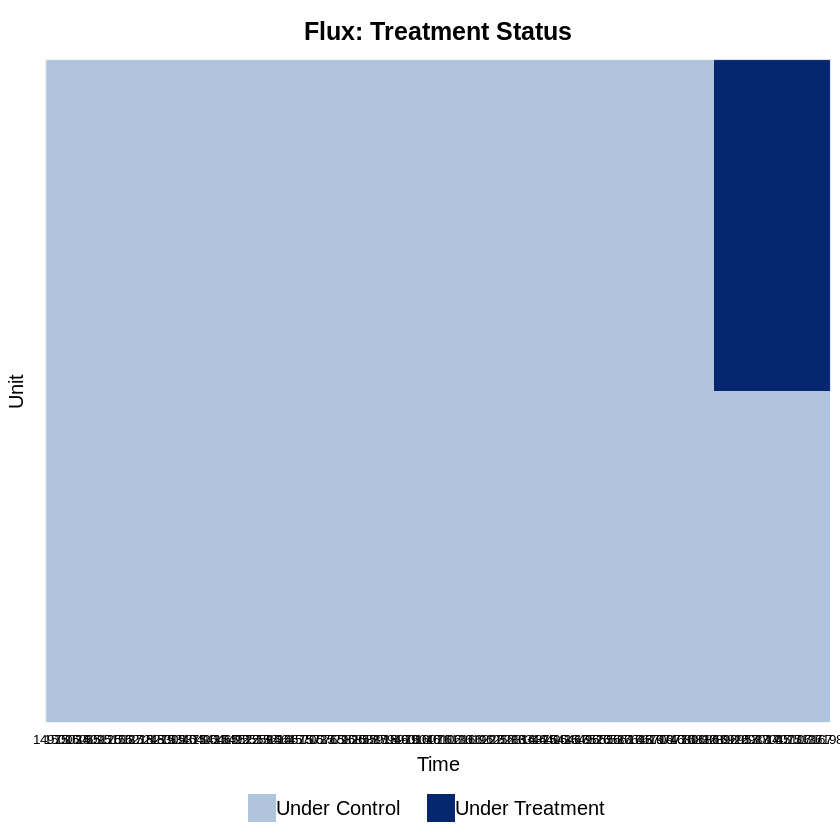

In [ ]:
library(panelView)
panelview(flow ~ treated_most, data = df_med, index = c("RouteNat","Date_Num"),
  axis.lab = "time", xlab = "Time", ylab = "Unit",
  gridOff = TRUE, by.timing = TRUE,
  background = "white", main = "Flux: Treatment Status")

In [ ]:
out_med_co.mc <- fect(flow ~ treated_median + gdp + fragility_index, data = df_med, index = c("RouteNat","Date_Num"), # "RouteNat:Date_Num",
          force = "two-way", method = "mc", CV = TRUE, group = "Route",
          se = TRUE, nboots = 200, parallel = TRUE)

# THIS SPECIFICATION HAS CONTROLS

Some units are totally removed after drop missing values of the outcome or covariates.


Parallel computing ...


Cross-validating ...


Criterion: Mean Squared Prediction Error


Matrix completion method...



 lambda.norm = 1.00000; MSPE = 1558890.94480; MSPTATT = 1127.40135; MSE = 591616.22482


 lambda.norm = 0.42170; MSPE = 1415521.96727; MSPTATT = 254.15374; MSE = 153565.23675


 lambda.norm = 0.17783; MSPE = 1137082.03760; MSPTATT = 96.78119; MSE = 69637.71823


 lambda.norm = 0.07499; MSPE = 1078101.34994; MSPTATT = 38.83705; MSE = 20993.48540

*


 lambda.norm = 0.03162; MSPE = 1092933.02504; MSPTATT = 9.60877; MSE = 6140.00200


 lambda.norm = 0.01334; MSPE = 1133628.11482; MSPTATT = 2.50647; MSE = 1730.61525


 lambda.norm = 0.00562; MSPE = 1238116.95522; MSPTATT = 0.70856; MSE = 456.59536



 lambda.norm* = 0.0749894209332456





Bootstrapping for uncertainties ... 

200 runs


Cannot use full pre-treatment periods in the F test. The first period is removed.




In [ ]:
out_med.mc <- fect(flow ~ treated_median, data = df_med, index = c("RouteNat","Date_Num"),
          force = "two-way", method = "mc", CV = TRUE, group = "Route",
          se = TRUE, nboots = 200, parallel = TRUE)

Parallel computing ...


Cross-validating ...


Criterion: Mean Squared Prediction Error


Matrix completion method...



 lambda.norm = 1.00000; MSPE = 417210.41356; MSPTATT = 893.08791; MSE = 503237.00087


 lambda.norm = 0.42170; MSPE = 334834.38937; MSPTATT = 192.97685; MSE = 130886.17321


 lambda.norm = 0.17783; MSPE = 240555.06385; MSPTATT = 67.18451; MSE = 58339.80077


 lambda.norm = 0.07499; MSPE = 222772.33387; MSPTATT = 30.41884; MSE = 17931.91404

*


 lambda.norm = 0.03162; MSPE = 224829.97389; MSPTATT = 7.59379; MSE = 5309.94301


 lambda.norm = 0.01334; MSPE = 241050.10410; MSPTATT = 1.84235; MSE = 1540.54538


 lambda.norm = 0.00562; MSPE = 292974.14328; MSPTATT = 0.46076; MSE = 423.98193



 lambda.norm* = 0.0749894209332456





Bootstrapping for uncertainties ... 

200 runs


Cannot use full pre-treatment periods in the F test. The first period is removed.




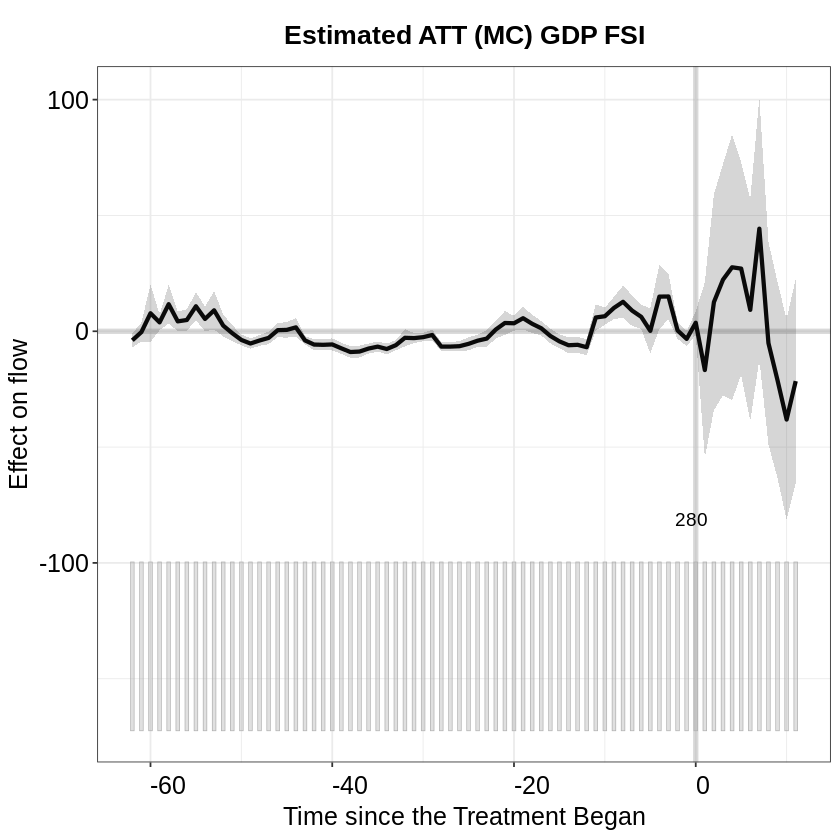

In [ ]:
plot(out_med_co.mc, main = "Estimated ATT (MC) GDP FSI", show.points = FALSE)

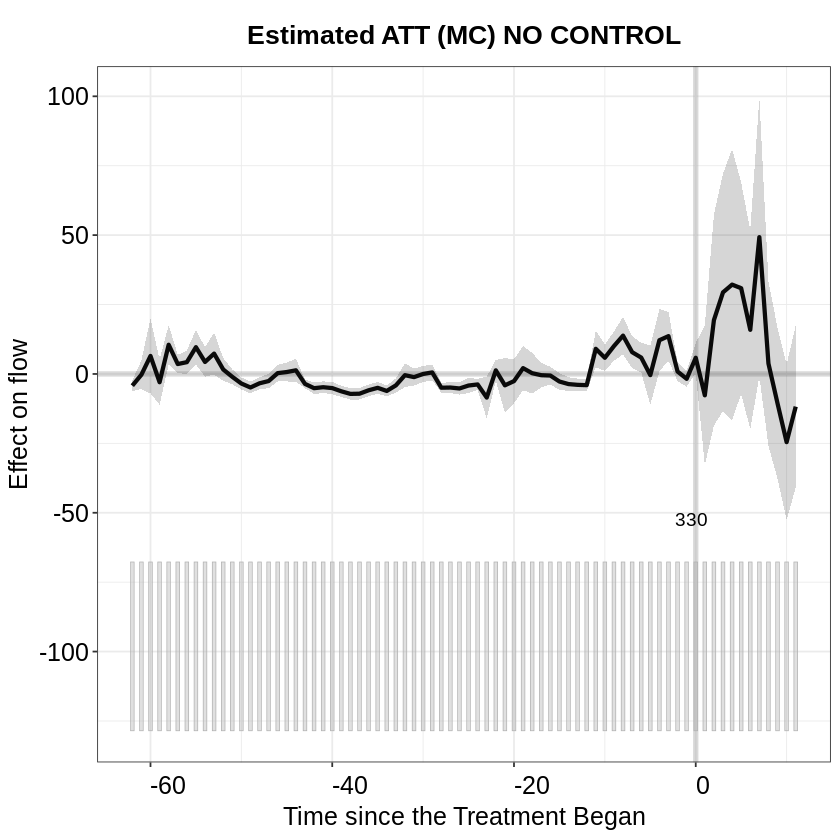

In [ ]:
plot(out_med.mc, main = "Estimated ATT (MC) NO CONTROL", show.points = FALSE)

In [ ]:
out_med.mc$est.group.att  #no controls 2018 !!!!!!!!!!!

,ATT,S.E.,CI.lower,CI.upper,p.value
Central Mediterranean Route,131.6872098,40.111023,53.0710498,210.303370,0.001026839
Eastern Borders Route,0.6246834,1.250884,-1.8270046,3.076371,0.617502237
Eastern Mediterranean Route,-65.5840874,43.179739,-150.2148204,19.046646,0.128797102
Western African Route,1.4636443,1.181336,-0.8517323,3.779021,0.215355340
Western Mediterranean Route,12.7842319,4.926076,3.1292994,22.439164,0.009453153


In [ ]:
print(out_med.mc) #no controls

Call:
fect.formula(formula = flow ~ treated_median, data = df_med, 
    group = "Route", index = c("RouteNat", "Date_Num"), force = "two-way", 
    CV = TRUE, method = "mc", se = TRUE, nboots = 200, parallel = TRUE)

ATT:
                            ATT  S.E. CI.lower CI.upper p.value
Tr obs equally weighted   11.47 16.24   -20.37     43.3  0.4802
Tr units equally weighted 11.47 16.24   -20.37     43.3  0.4802


In [ ]:
print(out_med_co.mc)

Call:
fect.formula(formula = flow ~ treated_median + gdp + fragility_index, 
    data = df_med, group = "Route", index = c("RouteNat", "Date_Num"), 
    force = "two-way", CV = TRUE, method = "mc", se = TRUE, nboots = 200, 
    parallel = TRUE)

ATT:
                            ATT  S.E. CI.lower CI.upper p.value
Tr obs equally weighted   3.678 21.98   -39.41    46.77  0.8671
Tr units equally weighted 3.678 21.98   -39.41    46.77  0.8671

Covariates:
                      Coef     S.E.  CI.lower CI.upper p.value
gdp             -4.351e-05 0.001538 -0.003057  0.00297  0.9774
fragility_index  1.756e+00 1.984405 -2.133381  5.64534  0.3762


In [ ]:
out_med.mc$est.group.att #no controls

,ATT,S.E.,CI.lower,CI.upper,p.value
Central Mediterranean Route,198.1910945,59.609497,81.3586270,315.023562,0.0008847432
Eastern Borders Route,0.9550898,1.306313,-1.6052375,3.515417,0.4646974720
Eastern Mediterranean Route,-66.7282825,38.116359,-141.4349741,7.978409,0.0800067689
Western African Route,1.6453662,1.263303,-0.8306622,4.121395,0.1927687744
Western Mediterranean Route,6.5493283,3.060704,0.5504585,12.548198,0.0323700449


In [ ]:
out_med_co.mc$est.group.att

,ATT,S.E.,CI.lower,CI.upper,p.value
Central Mediterranean Route,193.789060,58.926433,78.295373,309.282747,0.001006652
Eastern Borders Route,-3.035022,3.102335,-9.115487,3.045443,0.327924685
Eastern Mediterranean Route,-80.521304,52.678837,-183.769928,22.727320,0.126380433
Western African Route,-4.239114,4.765205,-13.578745,5.100517,0.373682161
Western Mediterranean Route,1.058483,5.224750,-9.181838,11.298804,0.839455401


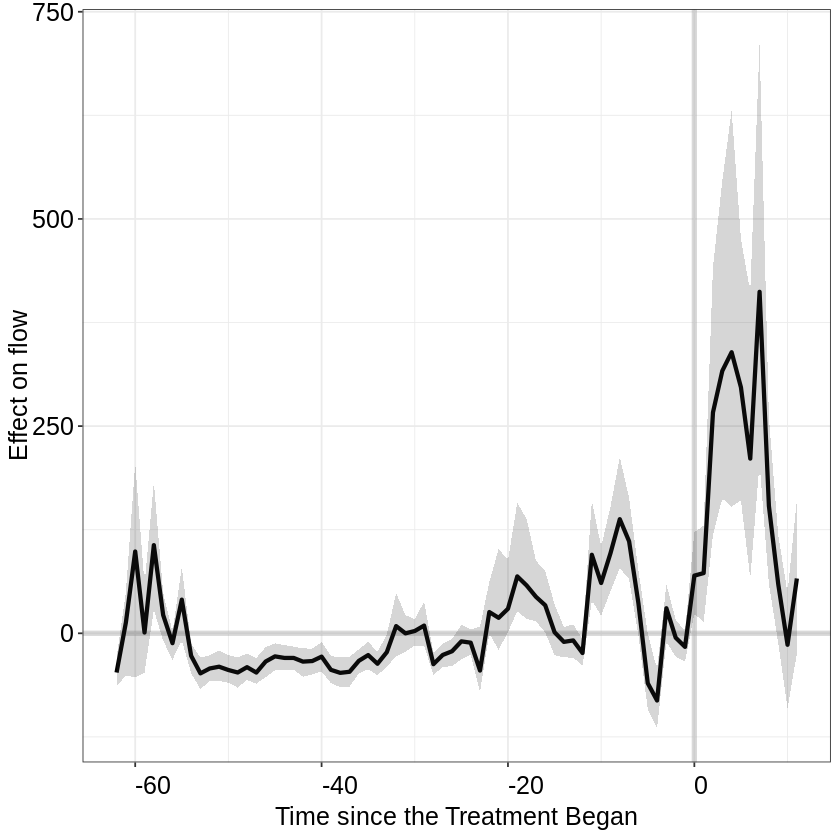

In [ ]:
plot(out_med.mc, main = "", show.group = "Central Mediterranean Route", count = FALSE, show.points = FALSE)

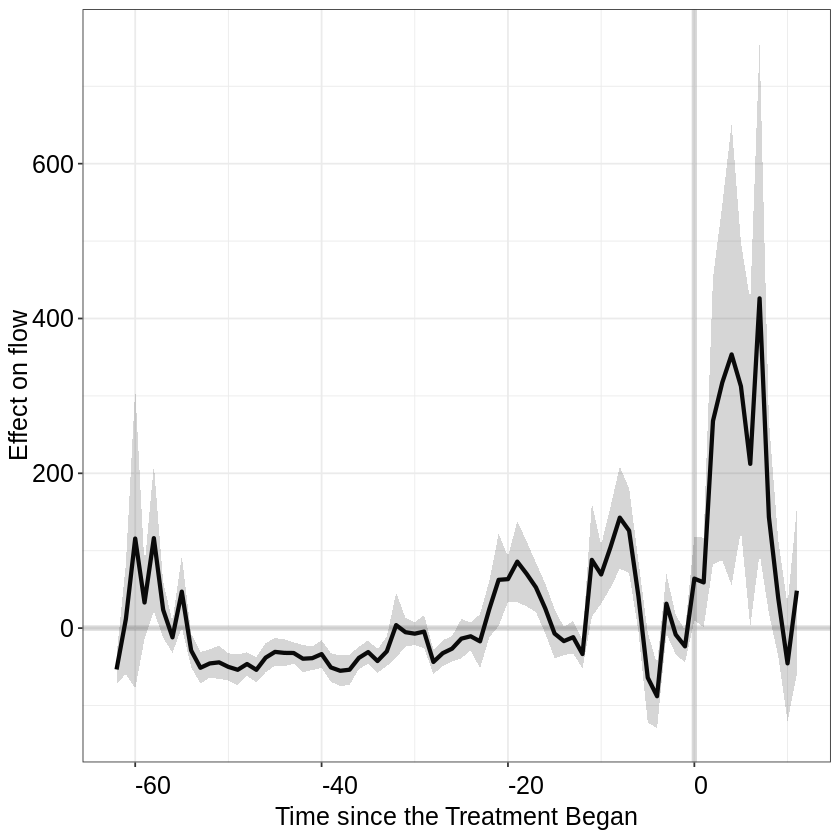

In [ ]:
plot(out_med_co.mc, main = "", show.group = "Central Mediterranean Route", count = FALSE, show.points = FALSE)

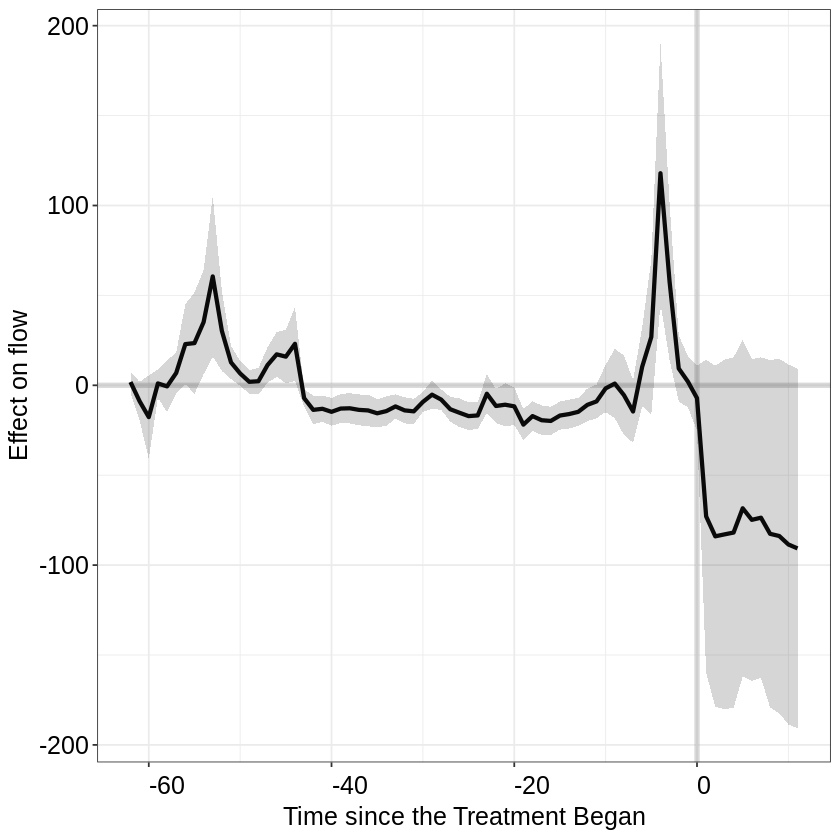

In [ ]:
plot(out_med_co.mc, main = "", show.group = "Eastern Mediterranean Route", count= FALSE, show.points = FALSE )

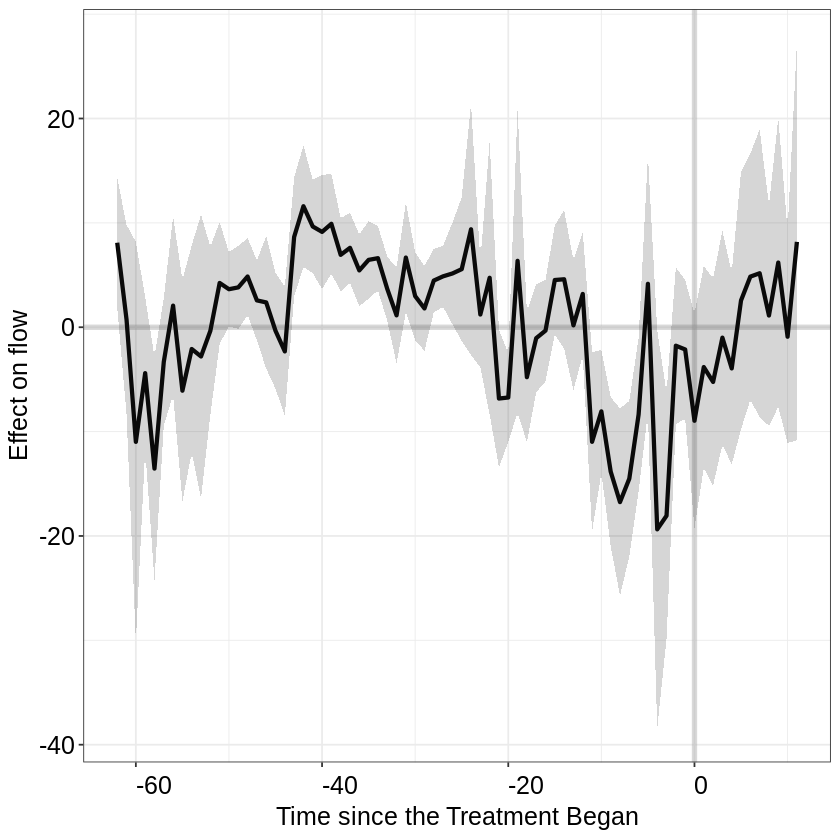

In [ ]:
plot(out_med_co.mc, main = "", show.group = "Western Mediterranean Route", count = FALSE, show.points = FALSE )


### Q1


In [ ]:
library(panelView)
panelview(flow ~ treated_q1, data = df_med, index = c("RouteNat","Date_Num"),
  axis.lab = "time", xlab = "Time", ylab = "Unit",
  gridOff = TRUE, by.timing = TRUE,
  background = "white", main = "Flux: Treatment Status")

ERROR: Error in library(panelView): there is no package called ‘panelView’


Time is not evenly distributed (possibly due to missing data).




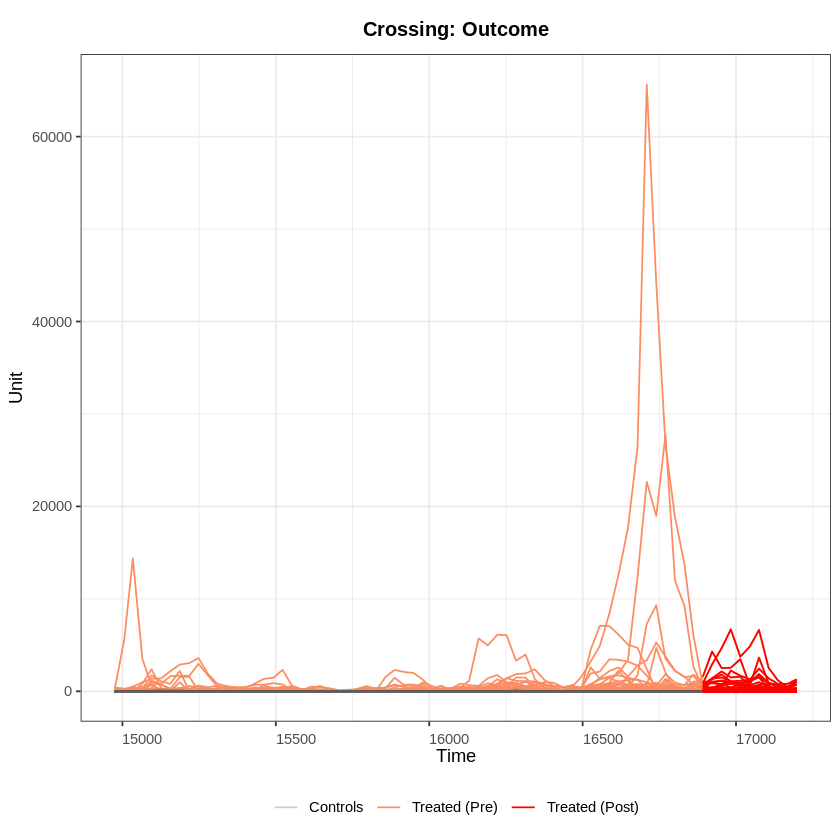

In [ ]:
panelview(flow ~ treated_q1 + gdp + fragility_index, data = df_med, index = c("RouteNat","Date_Num"),
  axis.lab = "time", xlab = "Time", ylab = "Unit",
  theme.bw = TRUE, type = "outcome", main = "Crossing: Outcome", display.all = TRUE)
#> Treatment has reversals.

In [ ]:
out_med_q1.mc <- fect(flow ~ treated_q1 + gdp + fragility_index, data = df_med, index = c("RouteNat","Date_Num"), # "RouteNat:Date_Num",
          force = "two-way", method = "mc", CV = TRUE, group = "Route",
          se = TRUE, nboots = 200, parallel = TRUE)

Some units are totally removed after drop missing values of the outcome or covariates.


Parallel computing ...


Cross-validating ...


Criterion: Mean Squared Prediction Error


Matrix completion method...



 lambda.norm = 1.00000; MSPE = 504259.39315; MSPTATT = 158.55031; MSE = 427428.52433


 lambda.norm = 0.42170; MSPE = 460720.08104; MSPTATT = 35.80498; MSE = 110932.42996


 lambda.norm = 0.17783; MSPE = 332193.28157; MSPTATT = 13.65236; MSE = 50298.67685


 lambda.norm = 0.07499; MSPE = 326634.73919; MSPTATT = 5.50214; MSE = 15168.37121

*


 lambda.norm = 0.03162; MSPE = 349244.62940; MSPTATT = 1.39434; MSE = 4436.38986


 lambda.norm = 0.01334; MSPE = 388974.17098; MSPTATT = 0.38776; MSE = 1250.93367


 lambda.norm = 0.00562; MSPE = 455149.76272; MSPTATT = 0.12019; MSE = 330.44106



 lambda.norm* = 0.0749894209332456





Bootstrapping for uncertainties ... 

200 runs


Cannot use full pre-treatment periods in the F test. The first period is removed.




In [ ]:
out_med_q1_noc.mc <- fect(flow ~ treated_q1 , data = df_med, index = c("RouteNat","Date_Num"), # "RouteNat:Date_Num",
          force = "two-way", method = "mc", CV = TRUE, group = "Route",
          se = TRUE, nboots = 200, parallel = TRUE)

Parallel computing ...


Cross-validating ...


Criterion: Mean Squared Prediction Error


Matrix completion method...



 lambda.norm = 1.00000; MSPE = 684449.10677; MSPTATT = 134.89396; MSE = 362961.13805


 lambda.norm = 0.42170; MSPE = 634409.15476; MSPTATT = 29.19623; MSE = 94397.16001


 lambda.norm = 0.17783; MSPE = 532289.66975; MSPTATT = 10.39279; MSE = 42070.40439


 lambda.norm = 0.07499; MSPE = 508162.31325; MSPTATT = 5.80664; MSE = 12931.19350

*


 lambda.norm = 0.03162; MSPE = 516669.76715; MSPTATT = 1.43493; MSE = 3831.65642


 lambda.norm = 0.01334; MSPE = 536769.72165; MSPTATT = 0.37107; MSE = 1111.81576


 lambda.norm = 0.00562; MSPE = 570892.28645; MSPTATT = 0.12200; MSE = 306.43610



 lambda.norm* = 0.0749894209332456





Bootstrapping for uncertainties ... 

200 runs


Cannot use full pre-treatment periods in the F test. The first period is removed.




In [ ]:
out_med_q1_noc.mc$est.group.att # no controls 2018!!!!!!

,ATT,S.E.,CI.lower,CI.upper,p.value
Central Mediterranean Route,98.311393,31.098436,37.359579,159.263208,0.001570682
Eastern Borders Route,2.564503,2.598322,-2.528114,7.657121,0.323650277
Eastern Mediterranean Route,-41.695623,24.371360,-89.462610,6.071364,0.087109695
Western African Route,3.160651,2.533928,-1.805756,8.127058,0.212275483
Western Mediterranean Route,11.893849,4.700573,2.680895,21.106803,0.011396577


In [ ]:
print(out_med_q1_noc.mc) # no controls

Call:
fect.formula(formula = flow ~ treated_q1, data = df_med, group = "Route", 
    index = c("RouteNat", "Date_Num"), force = "two-way", CV = TRUE, 
    method = "mc", se = TRUE, nboots = 200, parallel = TRUE)

ATT:
                            ATT  S.E. CI.lower CI.upper p.value
Tr obs equally weighted   10.46 12.09   -13.24    34.16  0.3869
Tr units equally weighted 10.46 12.09   -13.24    34.16  0.3869


In [ ]:
out_med_q1_noc.mc$est.group.att # no controls

,ATT,S.E.,CI.lower,CI.upper,p.value
Central Mediterranean Route,146.766165,44.749631,59.0585001,234.473830,0.001039109
Eastern Borders Route,2.743918,2.685791,-2.5201345,8.007971,0.306950038
Eastern Mediterranean Route,-42.585577,24.449926,-90.5065505,5.335397,0.081552782
Western African Route,3.255069,2.734736,-2.1049138,8.615053,0.233940907
Western Mediterranean Route,6.991187,3.329549,0.4653908,13.516982,0.035751725


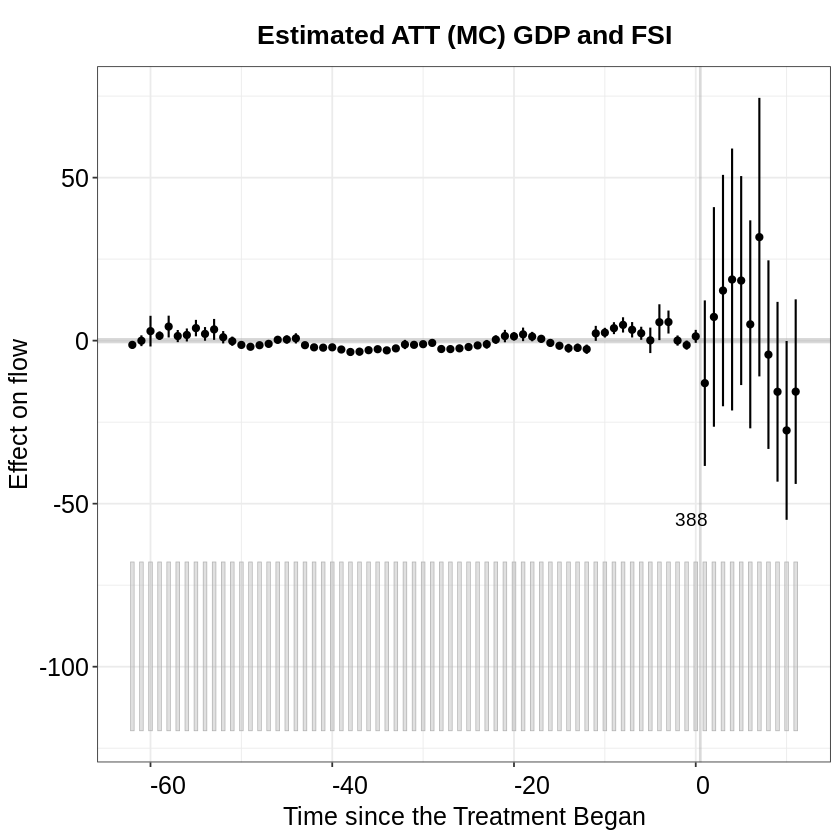

In [ ]:
plot(out_med_q1.mc, main = "Estimated ATT (MC) GDP and FSI")
# I tried this one becasue it allows to keep more entries

In [ ]:
print(out_med_q1.mc)

Call:
fect.formula(formula = flow ~ treated_q1 + gdp + fragility_index, 
    data = df_med, group = "Route", index = c("RouteNat", "Date_Num"), 
    force = "two-way", CV = TRUE, method = "mc", se = TRUE, nboots = 200, 
    parallel = TRUE)

ATT:
                           ATT  S.E. CI.lower CI.upper p.value
Tr obs equally weighted   1.85 14.78   -27.11    30.81  0.9004
Tr units equally weighted 1.85 14.78   -27.11    30.81  0.9004

Covariates:
                      Coef     S.E.  CI.lower CI.upper p.value
gdp             -5.034e-05 0.001612 -0.003209 0.003108  0.9751
fragility_index  1.834e+00 1.914198 -1.917390 5.586129  0.3379


In [ ]:
out_med_q1.mc$est.group.att
#gdp and fsi

,ATT,S.E.,CI.lower,CI.upper,p.value
Central Mediterranean Route,138.1677420,44.873773,50.216763,226.118721,0.00207675
Eastern Borders Route,-2.8087124,2.436146,-7.583470,1.966045,0.24893795
Eastern Mediterranean Route,-55.6507158,33.078324,-120.483040,9.181609,0.09249281
Western African Route,-4.7599716,4.464018,-13.509286,3.989343,0.28628914
Western Mediterranean Route,-0.6141077,4.734593,-9.893739,8.665524,0.89679860


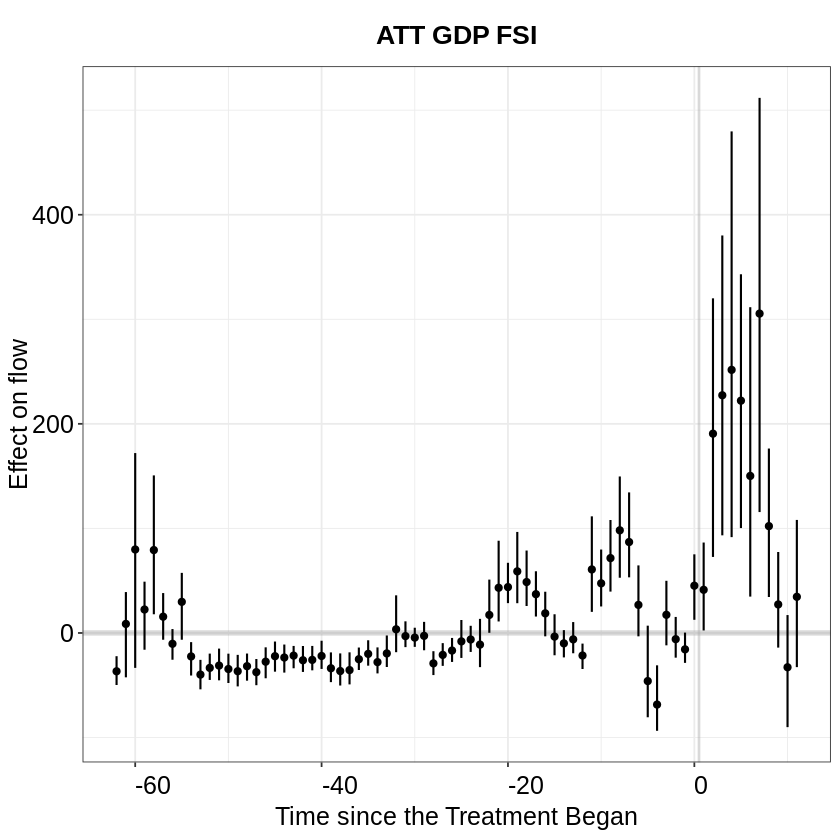

In [ ]:
plot(out_med_q1.mc, main = "ATT GDP FSI", show.group = "Central Mediterranean Route", count = FALSE)

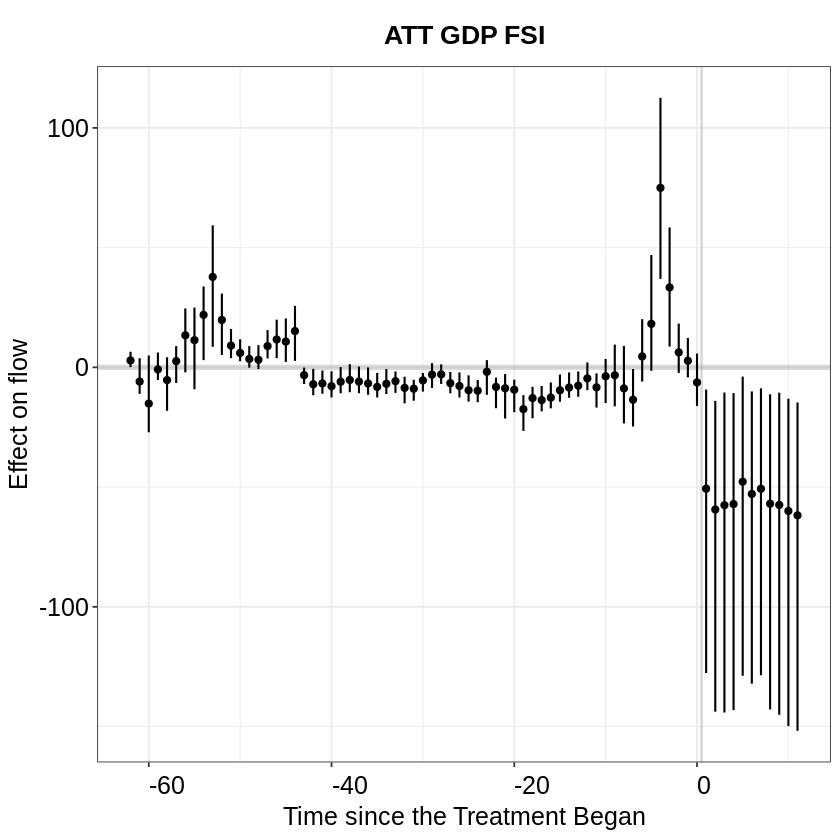

In [ ]:
plot(out_med_q1.mc, main = "ATT GDP FSI", show.group = "Eastern Mediterranean Route", count = FALSE)

### Q3


In [ ]:
out_med_q3.mc <- fect(flow ~ treated_q3 + gdp + fragility_index, data = df_med, index = c("RouteNat","Date_Num"), # "RouteNat:Date_Num",
          force = "two-way", method = "mc", CV = TRUE, group = "Route",
          se = TRUE, nboots = 200, parallel = TRUE)

Some units are totally removed after drop missing values of the outcome or covariates.


Parallel computing ...


Cross-validating ...


Criterion: Mean Squared Prediction Error


Matrix completion method...



 lambda.norm = 1.00000; MSPE = 72557.09815; MSPTATT = 9730.68325; MSE = 1115824.87985


 lambda.norm = 0.42170; MSPE = 47079.96526; MSPTATT = 2111.18541; MSE = 288324.10388


 lambda.norm = 0.17783; MSPE = 33696.44128; MSPTATT = 741.38881; MSE = 129807.37671


 lambda.norm = 0.07499; MSPE = 31575.71544; MSPTATT = 278.56217; MSE = 38290.31485

*


 lambda.norm = 0.03162; MSPE = 31711.28219; MSPTATT = 66.08716; MSE = 10551.54687


 lambda.norm = 0.01334; MSPE = 34363.85182; MSPTATT = 16.88415; MSE = 2935.76649


 lambda.norm = 0.00562; MSPE = 42709.43940; MSPTATT = 3.98396; MSE = 767.67164



 lambda.norm* = 0.0749894209332456





Bootstrapping for uncertainties ... 

200 runs


Cannot use full pre-treatment periods in the F test. The first period is removed.




In [ ]:
out_med_q3_noc.mc <- fect(flow ~ treated_q3, data = df_med, index = c("RouteNat","Date_Num"), # "RouteNat:Date_Num",
          force = "two-way", method = "mc", CV = TRUE, group = "Route",
          se = TRUE, nboots = 200, parallel = TRUE)

Parallel computing ...


Cross-validating ...


Criterion: Mean Squared Prediction Error


Matrix completion method...



 lambda.norm = 1.00000; MSPE = 104425.36057; MSPTATT = 7583.72628; MSE = 957011.70286


 lambda.norm = 0.42170; MSPE = 63332.83941; MSPTATT = 1627.09089; MSE = 247659.88542


 lambda.norm = 0.17783; MSPE = 36966.50163; MSPTATT = 548.38722; MSE = 109508.13144


 lambda.norm = 0.07499; MSPE = 31971.74541; MSPTATT = 214.68272; MSE = 32757.14079


 lambda.norm = 0.03162; MSPE = 31509.24095; MSPTATT = 53.45851; MSE = 9167.18095

*


 lambda.norm = 0.01334; MSPE = 37162.77994; MSPTATT = 13.45429; MSE = 2598.90938


 lambda.norm = 0.00562; MSPE = 59735.74826; MSPTATT = 3.06802; MSE = 693.74835


 lambda.norm = 0.00237; MSPE = 88145.78789; MSPTATT = 0.72012; MSE = 173.20897



 lambda.norm* = 0.0316227766016838





Bootstrapping for uncertainties ... 

200 runs


Cannot use full pre-treatment periods in the F test. The first period is removed.




In [ ]:
out_med_q3_noc.mc$est.group.att # no controls 2018!!!!!!

,ATT,S.E.,CI.lower,CI.upper,p.value
Central Mediterranean Route,173.542337,73.890495,28.719628,318.3650472,0.018842002
Eastern Borders Route,-4.947079,1.876201,-8.624366,-1.2697919,0.008370383
Eastern Mediterranean Route,-132.118664,78.153230,-285.296180,21.0588523,0.090930801
Western African Route,-3.327782,1.902174,-7.055974,0.4004109,0.080211143
Western Mediterranean Route,10.743594,8.719545,-6.346401,27.8335888,0.217901349


In [ ]:
print(out_med_q3_noc.mc) #no controls

Call:
fect.formula(formula = flow ~ treated_q3, data = df_med, group = "Route", 
    index = c("RouteNat", "Date_Num"), force = "two-way", CV = TRUE, 
    method = "mc", se = TRUE, nboots = 200, parallel = TRUE)

ATT:
                             ATT  S.E. CI.lower CI.upper p.value
Tr obs equally weighted   -4.475 30.68   -64.61    55.66   0.884
Tr units equally weighted -4.475 30.68   -64.61    55.66   0.884


In [ ]:
out_med_q3_noc.mc$est.group.att # no controls

,ATT,S.E.,CI.lower,CI.upper,p.value
Central Mediterranean Route,257.6881012,109.883112,42.321160,473.05504253,0.01902141
Eastern Borders Route,-5.9398555,2.486729,-10.813754,-1.06595695,0.01691168
Eastern Mediterranean Route,-133.7255431,72.663126,-276.142654,8.69156736,0.06571695
Western African Route,-4.8737978,2.503774,-9.781104,0.03350875,0.05158503
Western Mediterranean Route,0.4906422,4.703842,-8.728719,9.71000337,0.91692596


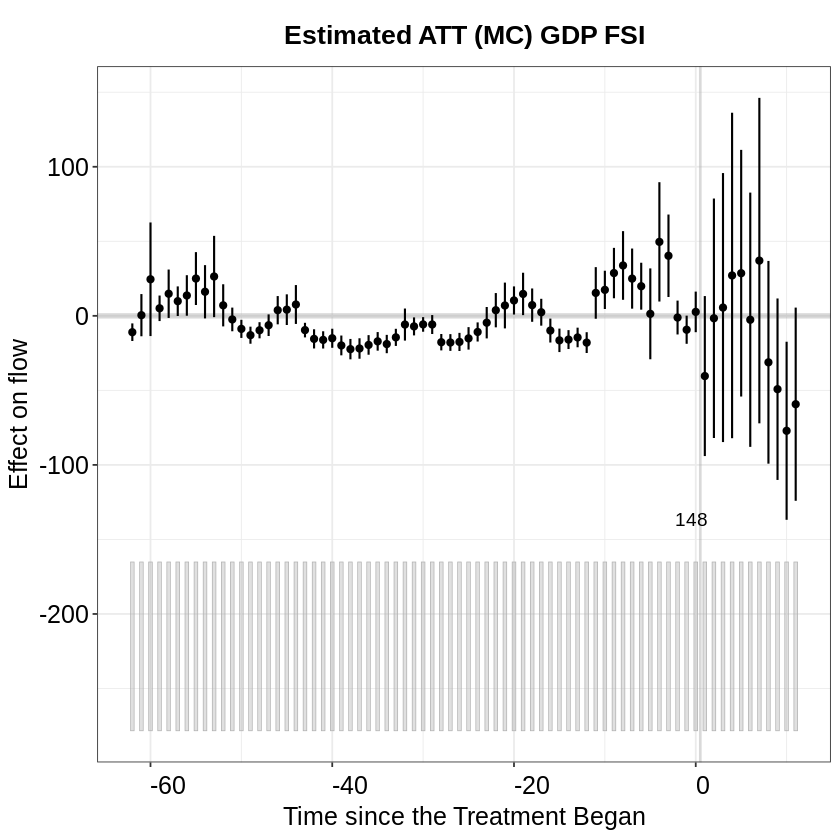

In [ ]:
plot(out_med_q3.mc, main = "Estimated ATT (MC) GDP FSI") # Not that good?

In [ ]:
print(out_med_q3.mc)

Call:
fect.formula(formula = flow ~ treated_q3 + gdp + fragility_index, 
    data = df_med, group = "Route", index = c("RouteNat", "Date_Num"), 
    force = "two-way", CV = TRUE, method = "mc", se = TRUE, nboots = 200, 
    parallel = TRUE)

ATT:
                             ATT  S.E. CI.lower CI.upper p.value
Tr obs equally weighted   -14.83 36.44   -86.26    56.59   0.684
Tr units equally weighted -14.83 36.44   -86.26    56.59   0.684

Covariates:
                     Coef     S.E.  CI.lower CI.upper p.value
gdp             0.0001336 0.001634 -0.003069 0.003336  0.9348
fragility_index 1.7600366 1.561143 -1.299747 4.819820  0.2596


In [ ]:
out_med_q3.mc$est.group.att

,ATT,S.E.,CI.lower,CI.upper,p.value
Central Mediterranean Route,261.735068,114.492073,37.33473,486.1354072,0.02225110
Eastern Borders Route,-8.500863,4.020254,-16.38042,-0.6213100,0.03447182
Eastern Mediterranean Route,-158.291569,83.977912,-322.88525,6.3021145,0.05944076
Western African Route,-9.027953,4.189151,-17.23854,-0.8173687,0.03115561
Western Mediterranean Route,-7.159564,4.976710,-16.91374,2.5946078,0.15025994


In [ ]:
out_med_q3.mc$est.group.att
#gdp and fsi

,ATT,S.E.,CI.lower,CI.upper,p.value
Central Mediterranean Route,261.735068,114.492073,37.33473,486.1354072,0.02225110
Eastern Borders Route,-8.500863,4.020254,-16.38042,-0.6213100,0.03447182
Eastern Mediterranean Route,-158.291569,83.977912,-322.88525,6.3021145,0.05944076
Western African Route,-9.027953,4.189151,-17.23854,-0.8173687,0.03115561
Western Mediterranean Route,-7.159564,4.976710,-16.91374,2.5946078,0.15025994


## Placebo test

In [ ]:
out_med_co.mc.p <- fect(flow ~ treated_median + gdp + fragility_index, data = df_med, index = c("RouteNat","Date_Num"),
  force = "two-way", method = "mc",  lambda = out_med_co.mc$lambda.cv,
  CV = 0, parallel = TRUE, se = TRUE, na.rm = TRUE, group = "Route",
  nboots = 500, placeboTest = TRUE, placebo.period = c(-3, 0))

Parallel computing ...


Bootstrapping for uncertainties ... 

500 runs




In [ ]:
out_med_co_6.mc.p <- fect(flow ~ treated_median + gdp + fragility_index, data = df_med, index = c("RouteNat","Date_Num"),
  force = "two-way", method = "mc",  lambda = out_med_co.mc$lambda.cv,
  CV = 0, parallel = TRUE, se = TRUE, na.rm = TRUE, group = "Route",
  nboots = 500, placeboTest = TRUE, placebo.period = c(-5, 0))

Parallel computing ...


Bootstrapping for uncertainties ... 

500 runs




In [ ]:
out_med.mc.p <- fect(flow ~ treated_median , data = df_med, index = c("RouteNat","Date_Num"),
  force = "two-way", method = "mc",  lambda = out_med.mc$lambda.cv,
  CV = 0, parallel = TRUE, se = TRUE, na.rm = TRUE, group = "Route",
  nboots = 500, placeboTest = TRUE, placebo.period = c(-3, 0))

Parallel computing ...


Bootstrapping for uncertainties ... 

500 runs




In [ ]:
out_med_6.mc.p <- fect(flow ~ treated_median , data = df_med, index = c("RouteNat","Date_Num"),
  force = "two-way", method = "mc",  lambda = out_med.mc$lambda.cv,
  CV = 0, parallel = TRUE, se = TRUE, na.rm = TRUE, group = "Route",
  nboots = 500, placeboTest = TRUE, placebo.period = c(-5, 0))

Parallel computing ...


Bootstrapping for uncertainties ... 

500 runs




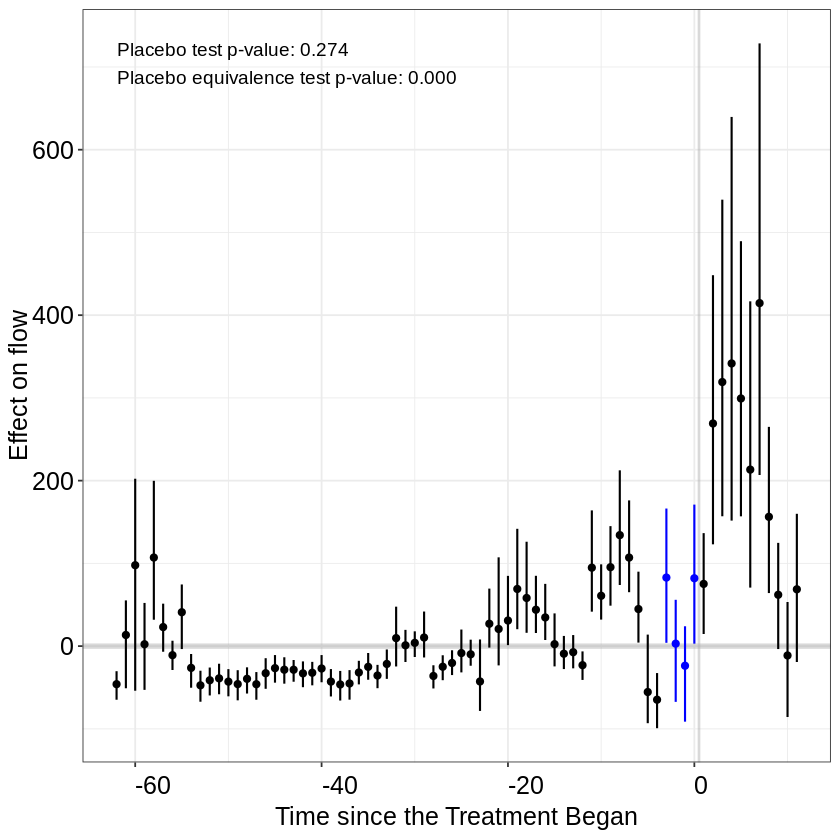

In [ ]:
plot(out_med.mc.p, vis = "none", cex.text = 0.8, stats = c("placebo.p","equiv.p"), main = "", show.group = "Central Mediterranean Route", count = FALSE)

#"""A larger placebo p-value from a t-test and a smaller placebo TOST p-value are preferred."""


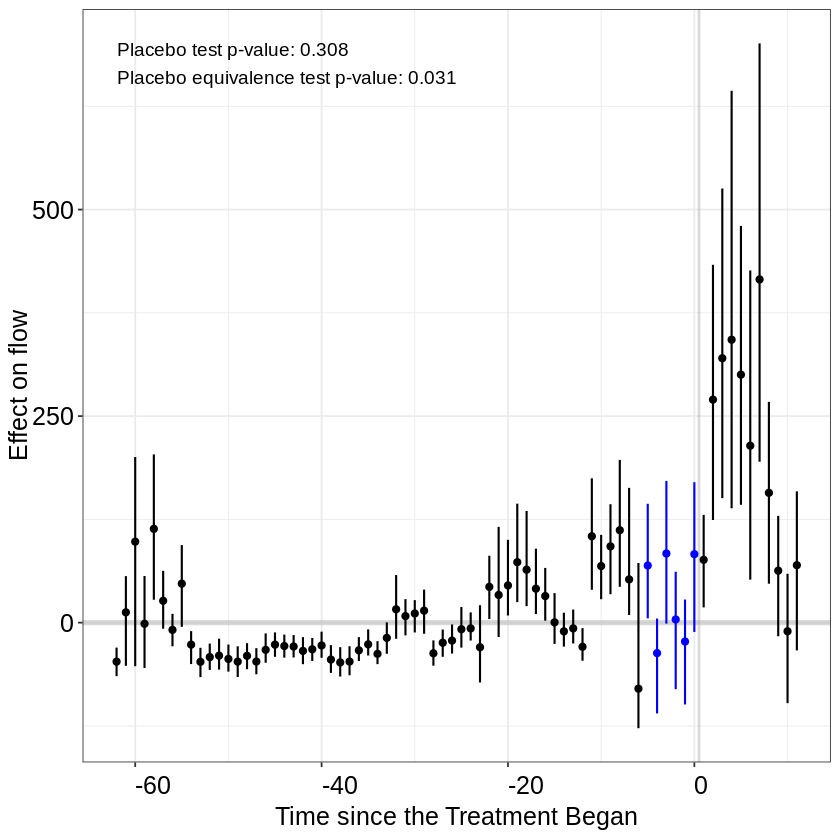

In [ ]:
plot(out_med_6.mc.p, vis = "none", cex.text = 0.8, stats = c("placebo.p","equiv.p"), main = "", show.group = "Central Mediterranean Route", count = FALSE)

#"""A larger placebo p-value from a t-test and a smaller placebo TOST p-value are preferred."""


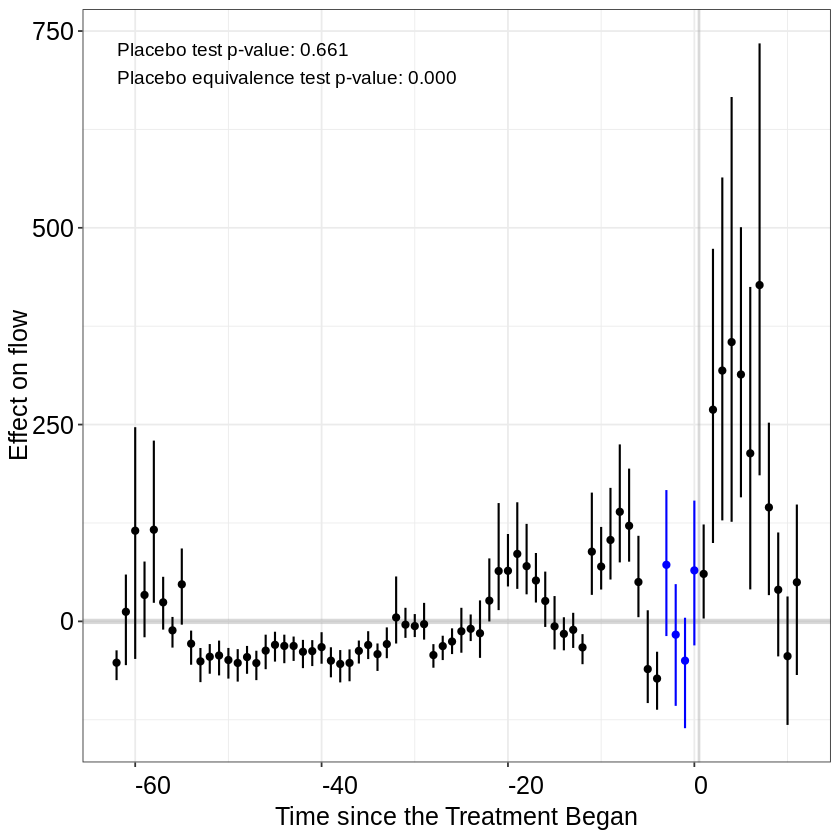

In [ ]:
plot(out_med_co.mc.p, vis = "none", cex.text = 0.8, stats = c("placebo.p","equiv.p"), main = "", show.group = "Central Mediterranean Route", count = FALSE)

#"""A larger placebo p-value from a t-test and a smaller placebo TOST p-value are preferred."""

# GDP and FSI

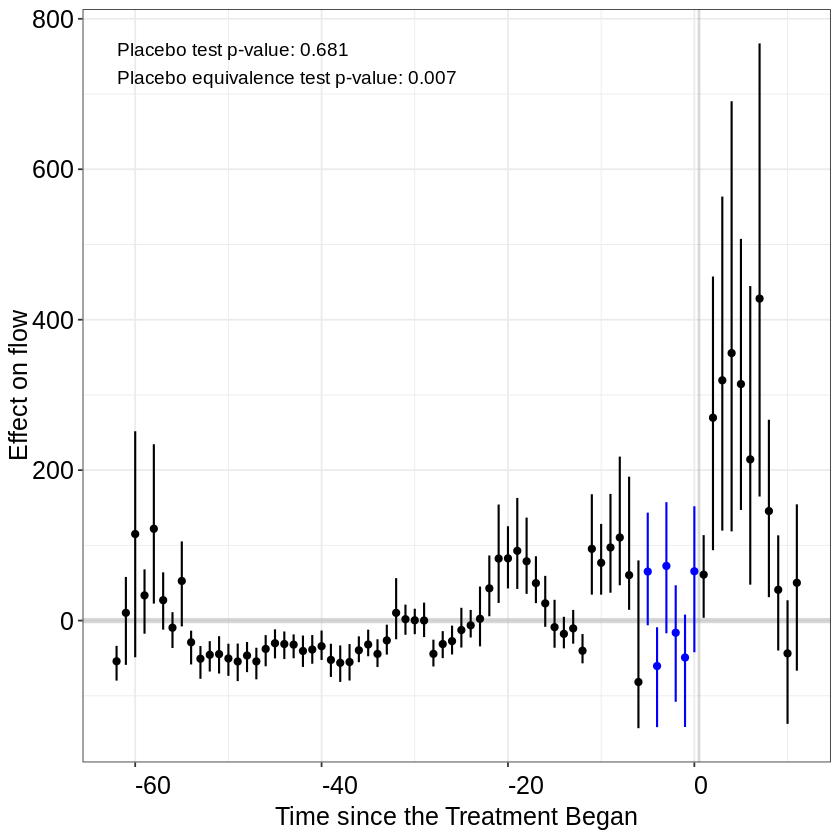

In [ ]:
plot(out_med_co_6.mc.p, vis = "none", cex.text = 0.8, stats = c("placebo.p","equiv.p"), main = "", show.group = "Central Mediterranean Route", count = FALSE)

#"""A larger placebo p-value from a t-test and a smaller placebo TOST p-value are preferred."""

# GDP and FSI

In [ ]:
plot(out_med.mc.p, vis = "none", cex.text = 0.8, stats = c("placebo.p","equiv.p"), main = "", show.group = "Central Mediterranean Route", count = FALSE)

#"""A larger placebo p-value from a t-test and a smaller placebo TOST p-value are preferred."""


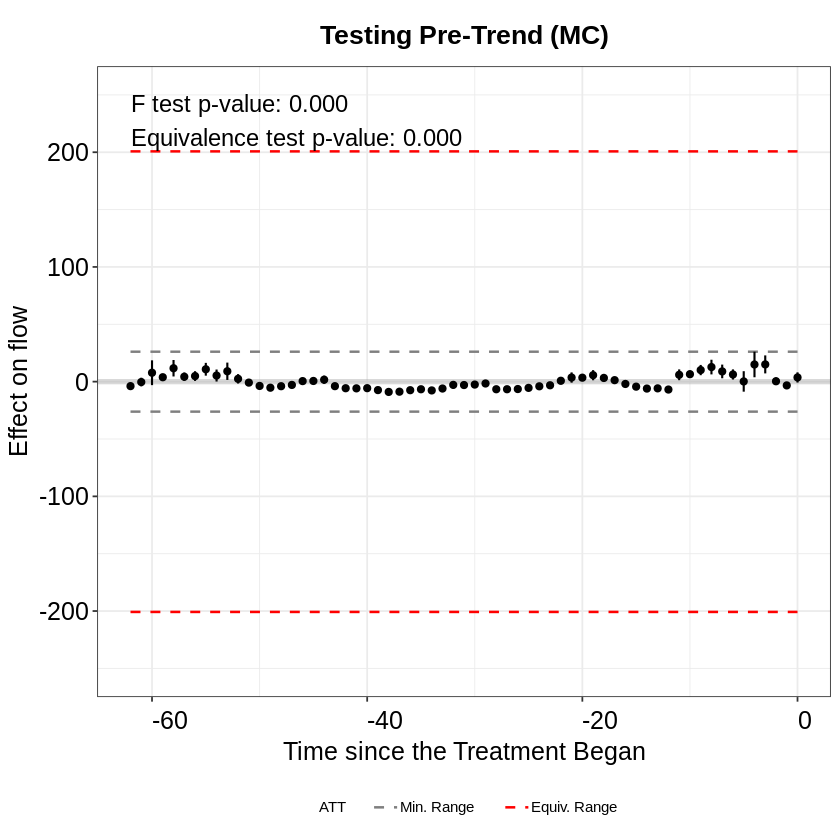

In [ ]:
plot(out_med_co.mc, pre.periods = c(-3,0), type = "equiv", ylim = c(-250,250),
     cex.legend = 0.6, main = "Testing Pre-Trend (MC)", cex.text = 1,  count = FALSE)

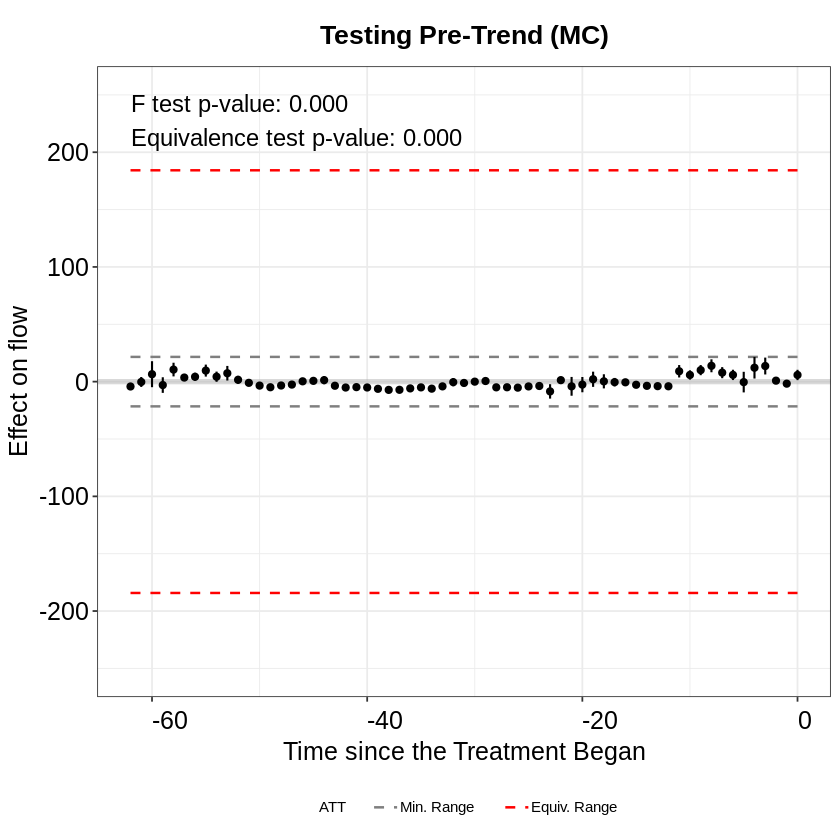

In [ ]:
plot(out_med.mc, pre.periods = c(-3,0), type = "equiv", ylim = c(-250,250),
     cex.legend = 0.6, main = "Testing Pre-Trend (MC)", cex.text = 1,  count = FALSE)